In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df_num = pd.read_csv('Data/zippedData/tn.movie_budgets.csv.gz')
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [3]:
df_num.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [4]:
def data_cleaning_money(column_name):
    df_num[column_name] = df_num[column_name].str.replace('$', '').str.replace(',', '').astype(float)

In [5]:
data_cleaning_money('production_budget')

In [6]:
df_num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382","$1,316,721,747"


In [7]:
data_cleaning_money('domestic_gross')

In [8]:
df_num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,"$1,316,721,747"


In [9]:
data_cleaning_money('worldwide_gross')

In [10]:
df_num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [11]:
df_num['release_date'] = pd.to_datetime(df_num['release_date'])

In [12]:
df_num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [13]:
df_num_cleaned = df_num.drop(columns = 'id')

In [14]:
df_num_cleaned.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [15]:
df_num_good = df_num_cleaned[df_num_cleaned['domestic_gross'] != 0.0]
df_num_good = df_num_good[df_num_good['worldwide_gross'] != 0.0]
df_num_good = df_num_good[df_num_good['production_budget'] != 0.0]
df_num_good = df_num_good[df_num_good['domestic_gross'] != df_num_good['worldwide_gross']]

In [16]:
df_num_good

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
5759,2006-06-02,The Puffy Chair,15000.0,194523.0,1.952540e+05
5773,1993-02-26,El Mariachi,7000.0,2040920.0,2.041928e+06
5774,2004-10-08,Primer,7000.0,424760.0,8.419260e+05
5775,2006-05-26,Cavite,7000.0,70071.0,7.164400e+04


In [17]:
df_num_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 5778
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       3982 non-null   datetime64[ns]
 1   movie              3982 non-null   object        
 2   production_budget  3982 non-null   float64       
 3   domestic_gross     3982 non-null   float64       
 4   worldwide_gross    3982 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 186.7+ KB


In [18]:
df_num_good['ROI'] = (df_num_good['worldwide_gross'] - df_num_good['production_budget']) / df_num_good['production_budget']

In [19]:
df_num_good.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,5.532577
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.546673
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.572108
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.243841
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.153696


In [20]:
df_num_final = df_num_good.sort_values(by = 'ROI', ascending = False)

In [21]:
df_num_final.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
5613,1980-03-21,Mad Max,200000.0,8750000.0,99750000.0,497.750000
5492,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,430.517853
5679,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740
5406,1999-07-14,The Blair Witch Project,600000.0,140539099.0,248300000.0,412.833333
5709,2004-05-07,Super Size Me,65000.0,11529368.0,22233808.0,341.058585


In [22]:
df_num_final.reset_index(inplace = True)

In [23]:
df_num_final

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,5613,1980-03-21,Mad Max,200000.0,8750000.0,99750000.0,497.750000
1,5492,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,430.517853
2,5679,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740
3,5406,1999-07-14,The Blair Witch Project,600000.0,140539099.0,248300000.0,412.833333
4,5709,2004-05-07,Super Size Me,65000.0,11529368.0,22233808.0,341.058585
...,...,...,...,...,...,...,...
3977,2318,2010-06-30,Love Ranch,25000000.0,137885.0,146149.0,-0.994154
3978,2005,2015-06-05,United Passions,30000000.0,918.0,168832.0,-0.994372
3979,4970,2010-06-11,Jerusalema,2000000.0,7294.0,10679.0,-0.994660
3980,4187,2007-10-03,Lake of Fire,6000000.0,25317.0,26007.0,-0.995665


In [24]:
df_num_final.drop(df_num_final[df_num_final['release_date'] < pd.Timestamp(2010, 1, 1)].index, inplace = True)

In [25]:
df_num_final

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
2,5679,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740
19,5211,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,100.759490
34,5062,2011-04-01,Insidious,1500000.0,54009150.0,99870886.0,65.580591
36,5213,2015-04-17,Unfriended,1000000.0,32789645.0,64364198.0,63.364198
41,4664,2010-10-20,Paranormal Activity 2,3000000.0,84752907.0,177512032.0,58.170677
...,...,...,...,...,...,...,...
3976,4059,2015-01-30,Trudno byt bogom,7000000.0,31443.0,41038.0,-0.994137
3977,2318,2010-06-30,Love Ranch,25000000.0,137885.0,146149.0,-0.994154
3978,2005,2015-06-05,United Passions,30000000.0,918.0,168832.0,-0.994372
3979,4970,2010-06-11,Jerusalema,2000000.0,7294.0,10679.0,-0.994660


<AxesSubplot:xlabel='production_budget', ylabel='ROI'>

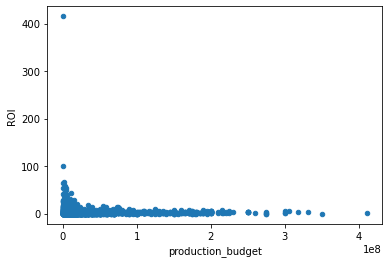

In [26]:
df_num_final.plot.scatter(x = 'production_budget', y = 'ROI')

In [27]:
df_num_final['profit'] = (df_num_final['worldwide_gross'] - df_num_final['production_budget'])

<AxesSubplot:xlabel='production_budget', ylabel='profit'>

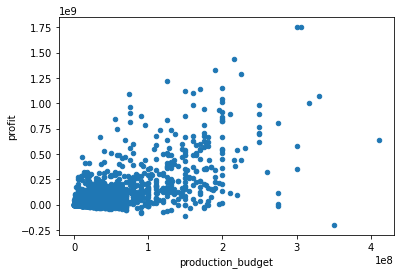

In [28]:
df_num_final.plot.scatter(x = 'production_budget', y = 'profit')

In [29]:
df_num_final.sort_values(by = 'profit', ascending = False)

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,profit
572,6,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,5.827114,1.748134e+09
590,5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,5.710167,1.747311e+09
499,33,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,6.669092,1.433855e+09
463,66,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,6.993278,1.328723e+09
586,26,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,5.746382,1.292936e+09
...,...,...,...,...,...,...,...,...
3771,478,2010-11-24,The Nutcracker in 3D,90000000.0,195459.0,2.046602e+07,-0.772600,-6.953398e+07
3614,300,2010-12-17,How Do You Know?,120000000.0,30212620.0,4.962818e+07,-0.586432,-7.037182e+07
3863,477,2017-04-21,The Promise,90000000.0,8224288.0,1.055142e+07,-0.882762,-7.944858e+07
3735,193,2011-03-11,Mars Needs Moms,150000000.0,21392758.0,3.954976e+07,-0.736335,-1.104502e+08


In [30]:
df_num_final['month'] = df_num_final['release_date'].dt.month

In [39]:
df_num_final

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,profit,month
2,5679,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740,41556474.0,7
19,5211,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,100.759490,100759490.0,1
34,5062,2011-04-01,Insidious,1500000.0,54009150.0,99870886.0,65.580591,98370886.0,4
36,5213,2015-04-17,Unfriended,1000000.0,32789645.0,64364198.0,63.364198,63364198.0,4
41,4664,2010-10-20,Paranormal Activity 2,3000000.0,84752907.0,177512032.0,58.170677,174512032.0,10
...,...,...,...,...,...,...,...,...,...
3976,4059,2015-01-30,Trudno byt bogom,7000000.0,31443.0,41038.0,-0.994137,-6958962.0,1
3977,2318,2010-06-30,Love Ranch,25000000.0,137885.0,146149.0,-0.994154,-24853851.0,6
3978,2005,2015-06-05,United Passions,30000000.0,918.0,168832.0,-0.994372,-29831168.0,6
3979,4970,2010-06-11,Jerusalema,2000000.0,7294.0,10679.0,-0.994660,-1989321.0,6


<AxesSubplot:xlabel='month', ylabel='profit'>

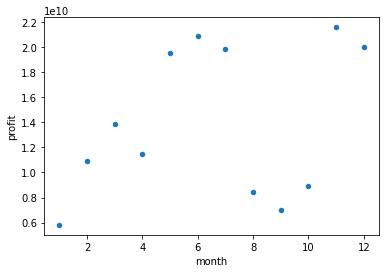

In [50]:
df_num_final.groupby(by = 'month').sum().reset_index().plot.scatter(x = 'month', y = 'profit')

In [51]:
df_num_final.groupby(by = 'month').sum().reset_index()

,month,index,production_budget,domestic_gross,worldwide_gross,ROI,profit
0,1,247629,3.481800e+09,3.740351e+09,9.301405e+09,425.513913,5.819605e+09
1,2,258050,5.243540e+09,6.754919e+09,1.616763e+10,344.362069,1.092409e+10
2,3,316673,7.478150e+09,8.959631e+09,2.131037e+10,363.591107,1.383222e+10
3,4,412619,4.560305e+09,6.017662e+09,1.602575e+10,399.474321,1.146545e+10
4,5,230497,8.901816e+09,1.038785e+10,2.843730e+10,336.094432,1.953548e+10
5,6,298363,8.161863e+09,1.144711e+10,2.905115e+10,403.346648,2.088928e+10
6,7,267242,7.696175e+09,1.005479e+10,2.753410e+10,873.190583,1.983793e+10
7,8,370715,4.804560e+09,6.045380e+09,1.323829e+10,373.985197,8.433729e+09
8,9,387507,4.090678e+09,4.706663e+09,1.110687e+10,329.913162,7.016189e+09
9,10,430920,4.349600e+09,5.321699e+09,1.327528e+10,558.609035,8.925677e+09
